##  Introduction

In this project we've got the various symptoms listed common in those who suffered with diabetes. The dataset is collected from kaggle with the task from a hospital they wanted to check the risk of diabetes of a person by checking these parameters.
 
End goal is to built a model which can predict the chances of a person having risk of diabetes by going through his report.

## Data Dictionary

*Number of times pregnant    

*Plasma glucose concentration a 2 hours in an oral glucose tolerance test

*Diastolic blood pressure (mm Hg)

*Triceps skin fold thickness (mm)

*2-Hour serum insulin (mu U/ml)

*Body mass index (weight in kg/(height in m)^2)

*Diabetes pedigree function

*Age (years)

*Class variable (0 or 1)

*Class Distribution: (class value 1 is interpreted as "tested positive for

*diabetes")

0 --- 500

1 ---- 268

In [55]:
#Now importing the libraries used for data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# models for scikit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# evaluating the data
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [17]:
diab = pd.read_csv('diabetes.csv')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Exploration

The goal here is to find out ore about the data and become a subject matter export on the dataset you're working

What question are you trying to solve
what kind of data do we have and how do we treat different types
what's missing from the data and how do you deal with it?
where are the outliers and why should you care about them?
How can you add change or remove feature of the data

In [6]:
diab['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
pd.crosstab(diab.Pregnancies, diab.Outcome)

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


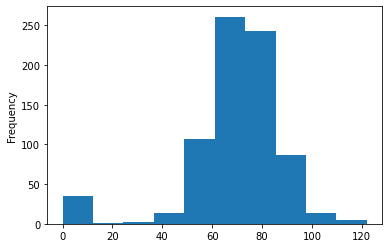

In [9]:
diab.BloodPressure.plot.hist()

In [11]:
diab.corr()
 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


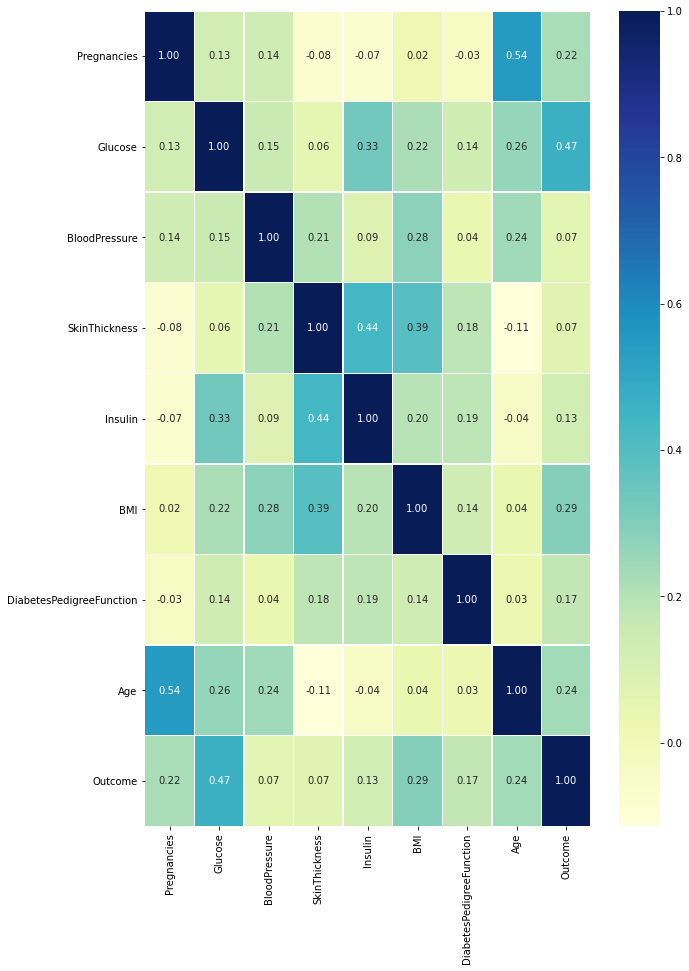

In [14]:
corr_metrics = diab.corr()
fig, ax=plt.subplots(figsize=(10,15))
ax =sns.heatmap(corr_metrics,
                annot=True,
                linewidths= 0.5,
                fmt='.2f',
                cmap='YlGnBu');


# Modeling 



In [20]:
# split data into x and y
x  = diab.drop('Outcome',axis=1)
y= diab['Outcome']

In [22]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Now we're going to try three models

k-neighbors
Logistic Regression
Random forest classifier


In [38]:
models= {'Logistic_Regression': LogisticRegression(),
         'knn': KNeighborsClassifier(),
         'RandomForest' : RandomForestClassifier()}

def fit_score(models, x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score = {}
    
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_test,y_test)
    return model_score

model_score=fit_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)


C:\Users\amarj\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(<matplotlib.axes._subplots.AxesSubplot at 0x20722c894f0>,
           Logistic_Regression       knn  RandomForest
 accuracy             0.746753  0.662338      0.720779)

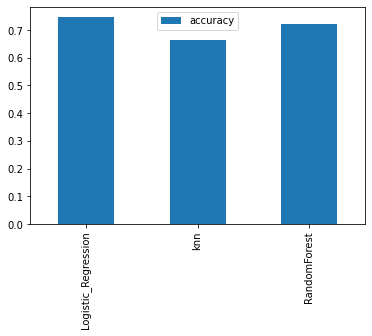

In [75]:
model_compare = pd.DataFrame(model_score,
                             index=['accuracy'])
model_compare.T.plot(kind='bar'), model_compare

In [45]:
# Hyperparameter tuning 
train_score = []
test_score = []

# create a list of range of n_neighbors
neighbors=(1,21)

# setup knn
knn= KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

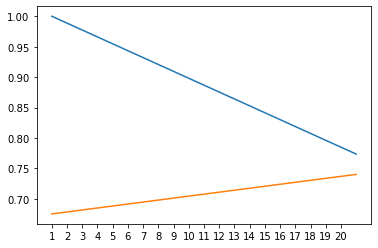

In [50]:
plt.plot(neighbors,train_score,label='TrainScore')
plt.plot(neighbors,test_score, label='TestScore')
plt.xticks(np.arange(1,21,1));


## Hyperparameter Tunning 

This step is done when we select the best fit model and then tunning our model on our dataset. As these tunning improves the model accuracy with 5%. This step make the model more friendly with the dataset and modify some of its parameters. 

* We'll use randomized cv which helps in tunning the model as this will allow the model to train on diffrent value of hyperparameter on a single run.

In [54]:
# create a hyperparameter for logistic Regression
log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver':['liblinear']}

In [83]:
# tune the logistic regression model
log_reg_ran = RandomizedSearchCV(LogisticRegression(),
            param_distributions = log_reg_grid,
               cv=5,
               n_iter=25,
               verbose=True)
log_reg_ran.fit(x_train,y_train)

C:\Users\amarj\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 20 is smaller than n_iter=25. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=25,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [84]:
log_reg_ran.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [85]:
log_reg_ran.score(x_test,y_test)

0.7597402597402597

In [99]:
# Tuning model for hyperparameter using GridsearchCV
log_reg_grid = {'C': np.logspace(-3,3,25),
                'solver':['liblinear']}

# Fitting the model
log_red_gr= GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                        cv=5,
                        verbose=True)
log_red_gr.fit(x_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03]),
                         'solver': ['liblinear']},
             verbose=True)

In [100]:
log_red_gr.best_params_

{'C': 3.1622776601683795, 'solver': 'liblinear'}

In [101]:
log_red_gr.score(x_test,y_test)

0.7532467532467533

In [104]:
# Finding the best parameter 
clf = LogisticRegression(C= 3.1622776601683795, solver= 'liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=3.1622776601683795, solver='liblinear')

In [105]:
clf.coef_

array([[ 0.06568604,  0.03008703, -0.01586026,  0.00253635, -0.0014218 ,
         0.08415246,  0.57357856,  0.03106638]])

In [108]:
feature_dict = dict(zip(diab.columns, list(clf.coef_[0])))
feature_dict

{'Pregnancies': 0.06568603591997672,
 'Glucose': 0.030087026427621982,
 'BloodPressure': -0.015860261939769544,
 'SkinThickness': 0.002536353160872085,
 'Insulin': -0.0014217968240924233,
 'BMI': 0.08415245513700348,
 'DiabetesPedigreeFunction': 0.5735785627018549,
 'Age': 0.031066379460064842}

In [148]:
diab['Outcome'] = diab[diab['Outcome']==1]
diab['Age'] = diab[diab['Age']> 40]
diab.shape


(768, 9)